In [ ]:
# AI Fall 2020 Final - Sara Tiffin

import itertools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [ ]:
df = pd.read_csv('/content/news_data/train.csv')
df.shape

(20800, 5)

In [ ]:
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [ ]:
df.loc[(df['label'] == 1), ['label']] = 'FAKE' 
df.loc[(df['label'] == 0), ['label']] = 'REAL'

labels = df.label
labels.head()

0    FAKE
1    REAL
2    FAKE
3    FAKE
4    FAKE
Name: label, dtype: object

In [ ]:
x_train, x_test, y_train, y_test=train_test_split(df['text'].values.astype('str'), labels, test_size=0.2, random_state=7)

In [ ]:
tfidf_vectorizer=TfidfVectorizer(stop_words='english', max_df=0.7)

# TFidfVectorizer converts a collection of raw documents into a matrix of 
# TF-IDF features.

# Here we are not declaring any explicit stop words, instead we are telling our vectorizer 
# to ignore terms that have a document frequency higher than the given threshhold (0.7)

# We could also give a list of specific stop words here if we so chose, but instead we 
# are having the vectorizer do it for us

# stop_words: {'english'}, list, default=None

In [ ]:
tfidf_train=tfidf_vectorizer.fit_transform(x_train)
tfidf_test=tfidf_vectorizer.transform(x_test)

In [ ]:
# Using PassiveAgressiveClassifier

pa_classifier=PassiveAggressiveClassifier(max_iter=50)
pa_classifier.fit(tfidf_train, y_train)

PassiveAggressiveClassifier(C=1.0, average=False, class_weight=None,
                            early_stopping=False, fit_intercept=True,
                            loss='hinge', max_iter=50, n_iter_no_change=5,
                            n_jobs=None, random_state=None, shuffle=True,
                            tol=0.001, validation_fraction=0.1, verbose=0,
                            warm_start=False)

In [ ]:
y_pred=pa_classifier.predict(tfidf_test)
score=accuracy_score(y_test, y_pred)
print(f'accuracy: {round(score*100,2)}')

accuracy: 96.66


In [ ]:
confusion_matrix(y_test, y_pred, labels=['FAKE', 'REAL'])

array([[2035,   65],
       [  74, 1986]])

In [ ]:
from sklearn import metrics

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization


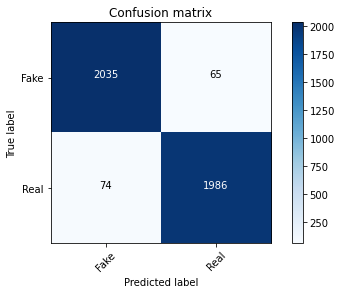

In [ ]:
cm = metrics.confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

In [ ]:
# Using different methods for a predictive model

# Logistic Regression

from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', LogisticRegression())])

model = pipe.fit(x_train, y_train)

y_pred = model.predict(x_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, y_pred)*100,2)))

accuracy: 95.02%


Confusion matrix, without normalization


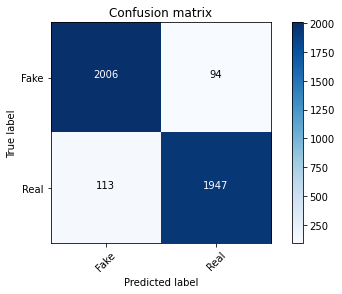

In [ ]:
cm = metrics.confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

In [ ]:
# Decision Trees

from sklearn.tree import DecisionTreeClassifier

pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', DecisionTreeClassifier(criterion= 'entropy',
                                           max_depth = 20, 
                                           splitter='best', 
                                           random_state=42))])
model = pipe.fit(x_train, y_train)

y_pred = model.predict(x_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, y_pred)*100,2)))

accuracy: 89.33%


Confusion matrix, without normalization


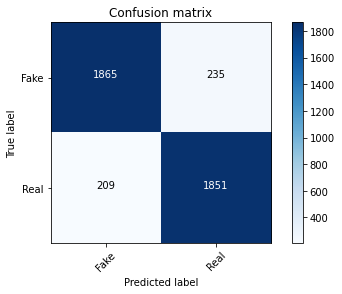

In [ ]:
cm = metrics.confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

In [ ]:
# Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier

pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', RandomForestClassifier(n_estimators=50, criterion="entropy"))])

model = pipe.fit(x_train, y_train)
y_pred = model.predict(x_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, y_pred)*100,2)))

accuracy: 91.44%


Confusion matrix, without normalization


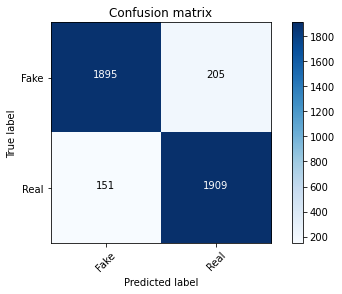

In [ ]:
cm = metrics.confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])